In [1]:
import numpy as np
import random
import time

In [2]:
import matplotlib
import IPython

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)

import astropy.units as u

In [4]:
print(np.__version__) #Should be 1.20.3

1.20.3


In [5]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd())+"/analysis_scripts")     #!!! Change path to location of differential_counts.py and ALP_sim.py
from ALP_quick_sim import ALP_sim

In [6]:
def full_params(
                params: list[float]
                ) -> list[float]:
        
        ''' 
        The default parameter expansion function. The expansion function allows to flexibly choose 
        which model parameters are considered as input to the model method (e.g. self.model,
        self.model_log, etc. Toy models are not affected). For example, when this present default 
        function is used, the only inputs to the model methods are the values of mass and coupling, 
        i.e. a 2D list. If you wanted to make, for example, the rms of the B-field the third input 
        parameter, first copy self.full_params_default to a new function new_func(params), change 
        the value corresponding to the B-field RMS value to "params[2]", and then set 
        self.full_param_vec (see init method) to new_func. See also method full_params_spectral for
        a different example. The model methods will then expect a 3D list instead. When running the 
        model method, self.full_param_vec(params) is called, effectively expanding the model 
        parameters to the full list of 18.  
        
        
        Input:
            -  params:              Input parameters to model methods. 

        Output:
            -  full_par             Full list of all 18 model parameter values. 


        '''
        
        full_par = [
                    params[0],          # mass m in neV
                    params[1],          # coupling constant g in 10^(-11) /GeV
                    
                    5.75 * 1e-9,        # Amplitude of power law, in "TeV-1 cm-2 s-1" # 10e-6 
                    2.36859,            # Spectral index of the PWL
                    153.86,             # Reference energy (?) E0, In GeV
                    819.72,             #Cut-off energy Ecut, in GeV
                    
                    
                    100.,                # rms of B field, default = 10.
                    39.,                # normalization of electron density, default = 39.
                    4.05,               # second normalization of electron density, see Churazov et al. 2003, Eq. 4, default = 4.05
                    500.,               # extension of the cluster, default = 500.
                    80.,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 80.
                    200.,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 200.
                    1.2,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 1.2
                    0.58,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 0.58
                    0.5,                # scaling of B-field with electron denstiy, default = 0.5
                    0.18,               # maximum turbulence scale in kpc^-1, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 0.18
                    9.,                 # minimum turbulence scale, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 9.
                    -2.80               # turbulence spectral index, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = -2.80
                    ]
    
        return full_par

In [7]:
A = ALP_sim(set_obs=False, set_null=False)

In [8]:
A.full_param_vec = full_params

In [9]:
A.configure_model(ALP_seed=0, residuals=False, logcounts=False)

In [10]:
A.configure_plot(xmax=None, ymin=None, ymax=None, figsize=(12,5))
legend=True

In [15]:
A.configure_obs(nbins = 100, nbins_etrue = 300,livetime = 0.01,irf_file = os.path.dirname(os.getcwd())+"/IRFs/CTA/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits" )

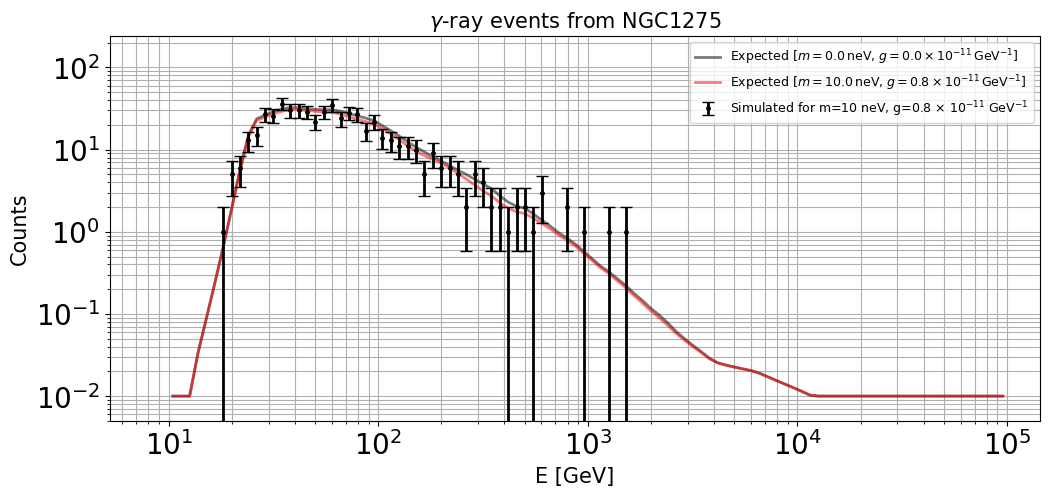

In [16]:
A.configure_model(params=[0,0], bkg=1)
A.compute_case(new_fig=1,plot_obs=0,color="k",linestyle="-",legend=1, errorbands=0)
A.configure_model(params=[10,0.8], bkg=1)
A.compute_case(new_fig=0,plot_obs=1,color="r",linestyle="-",legend=1, errorbands=0)


# 

In [ ]:
A.configure_obs(nbins = 100, nbins_etrue = 300,livetime = 250,irf_file = os.path.dirname(os.getcwd())+"/IRFs/CTA/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits" )

In [ ]:
A.configure_model(params=[0,0], bkg=1)
A.compute_case(new_fig=1,plot_obs=0,color="k",linestyle="-",legend=1, errorbands=0)
A.configure_model(params=[10,0.8], bkg=1)
A.compute_case(new_fig=0,plot_obs=1,color="r",linestyle="-",legend=1, errorbands=0)